# Comparing statsmodels to the casadi approach for Linear Mixed Models

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels

In [2]:
from jmspack.NLTSA import flatten

In [3]:
import casadi as ca

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
from scipy.stats import linregress
# from statsmodels.regression.linear_model import OLS

In [6]:
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression, Lasso

# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

In [7]:
tmp = os.getcwd()
os.chdir(tmp.split("/playground")[0])

# from romeo.romeo import ROMEO
# from romeo.utils import formula_parser

os.chdir(tmp)

# Statsmodels regularized mixedLM examples

In [8]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [9]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pig     861 non-null    int64  
 1   Evit    861 non-null    object 
 2   Cu      861 non-null    object 
 3   Litter  861 non-null    int64  
 4   Start   861 non-null    float64
 5   Weight  861 non-null    float64
 6   Feed    789 non-null    float64
 7   Time    861 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 53.9+ KB


In [11]:
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit(method=["lbfgs"])
# mdf.summary()

In [12]:
target = "Weight"
fixed_effect = "Time"
grouping_var = "Pig"

In [13]:
md = smf.mixedlm(f"{target} ~ {fixed_effect}", 
                 data, 
                 groups=data[grouping_var], 
#                  re_formula=f"~{fixed_effect}"
                )
mdf = md.fit(method=["lbfgs"])
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [14]:
mdf.params

Intercept    15.723523
Time          6.942505
Group Var     3.553717
dtype: float64

In [15]:
mdf.fittedvalues

0      21.452990
1      28.395495
2      35.338000
3      42.280505
4      49.223010
         ...    
856    72.143115
857    79.085620
858    86.028125
859    92.970630
860    99.913135
Length: 861, dtype: float64

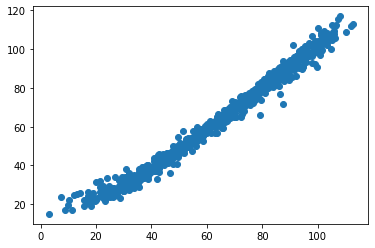

In [16]:
_ = plt.scatter(mdf.fittedvalues, data[target])

In [17]:
mdf.fe_params

Intercept    15.723523
Time          6.942505
dtype: float64

In [18]:
# import re

# formula_string = "Weight ~ Time + (1 + Time | Pig)"

# target = formula_string.replace(" ", "").split("~")[0]
# fixed_effect = formula_string.replace(" ", "").split("~")[1].split("+")[0]
# random_effects = re.findall("\((.*?)\)", formula_string)

# clusters = random_effects[0].replace(" ", "").split("+")[1].split("|")[1]

# {"target": target,
# "fixed_effect": fixed_effect,
# "random_effects": random_effects,
# "clusters": clusters}

# formula_parser(formula_string)

# LMM equation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [19]:
y = data[target]
y.head(2)

0    26.50000
1    27.59999
Name: Weight, dtype: float64

In [20]:
x = data[[fixed_effect]]
x.head(2)

,Time
0,1
1,2


In [21]:
u = data[grouping_var].unique()

In [22]:
u

array([4601, 4602, 4603, 4605, 4641, 4643, 4645, 4756, 4757, 4759, 4760,
       4813, 4814, 4815, 4817, 4854, 4856, 4857, 4858, 5389, 5392, 5497,
       5500, 5501, 5502, 5524, 5527, 5528, 5578, 5581, 5582, 5850, 5851,
       5852, 5862, 5865, 5866, 6055, 6056, 6057, 6058, 6207, 6208, 6211,
       6284, 6287, 6288, 6430, 6432, 6433, 6909, 6910, 6912, 8049, 8050,
       8051, 8053, 8139, 8141, 8142, 8144, 8191, 8192, 8193, 8195, 8269,
       8270, 8271, 8273, 8437, 8439, 8442])

In [23]:
len(u)

72

In [24]:
data[grouping_var]

0      4601
1      4601
2      4601
3      4601
4      4601
       ... 
856    8442
857    8442
858    8442
859    8442
860    8442
Name: Pig, Length: 861, dtype: int64

In [25]:
data[grouping_var].value_counts().sort_index()

4601    12
4602    12
4603    12
4605    12
4641    12
        ..
8271    12
8273    12
8437    12
8439    12
8442    12
Name: Pig, Length: 72, dtype: int64

In [26]:
data[grouping_var].value_counts().sort_values()

5527    11
5524    11
5528    11
6208    12
6211    12
        ..
8144    12
6056    12
4858    12
6058    12
4645    12
Name: Pig, Length: 72, dtype: int64

In [27]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[grouping_var]==cluster_group, grouping_var]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[grouping_var].shape[0] - tmp.index.tolist()[-1]+1)))

In [28]:
z_list[1].shape

(863,)

In [29]:
possible_Z_df = pd.DataFrame(np.vstack(z_list).T)#.head(50)

In [30]:
possible_Z_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8442
859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8442
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8442
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
binary_df = np.where(possible_Z_df > 0 , 1, possible_Z_df)

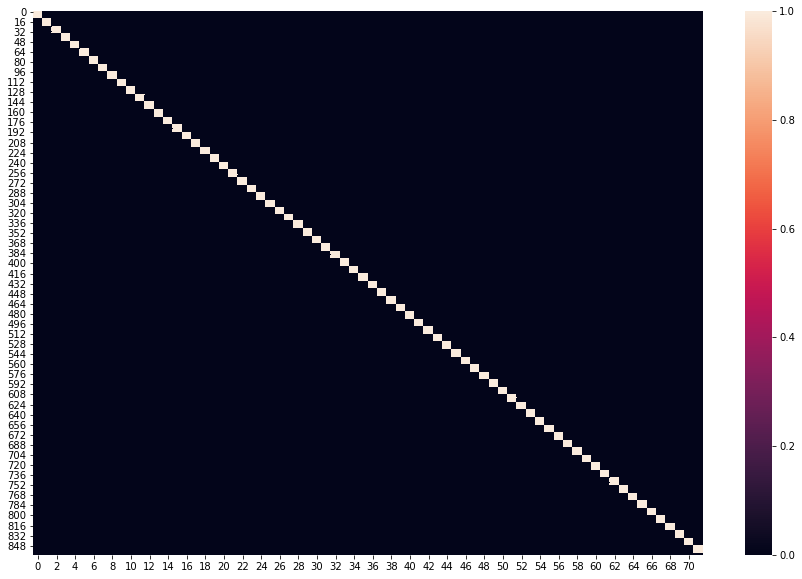

In [32]:
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(binary_df)

In [33]:
# Z = possible_Z_df.loc[0: 860].values
Z = binary_df[0: 861]

In [34]:
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [35]:
x.shape, y.shape

((861, 1), (861,))

In [36]:
x.head()

,Time
0,1
1,2
2,3
3,4
4,5


In [37]:
x.shape

(861, 1)

In [38]:
Z.shape

(861, 72)

In [39]:
y.values.reshape(-1, 1).shape

(861, 1)

In [40]:
data[target] 

0       26.50000
1       27.59999
2       36.50000
3       40.29999
4       49.09998
         ...    
856     73.19995
857     81.69995
858     90.29999
859     96.00000
860    103.50000
Name: Weight, Length: 861, dtype: float64

In [41]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[grouping_var]==cluster_group, fixed_effect]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[grouping_var].shape[0] - tmp.index.tolist()[-1]+1)))

In [42]:
z_list[1].shape

(863,)

In [43]:
possible_Z_slope_df = pd.DataFrame(np.vstack(z_list).T)[0: 861]#.head(50)

In [44]:
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

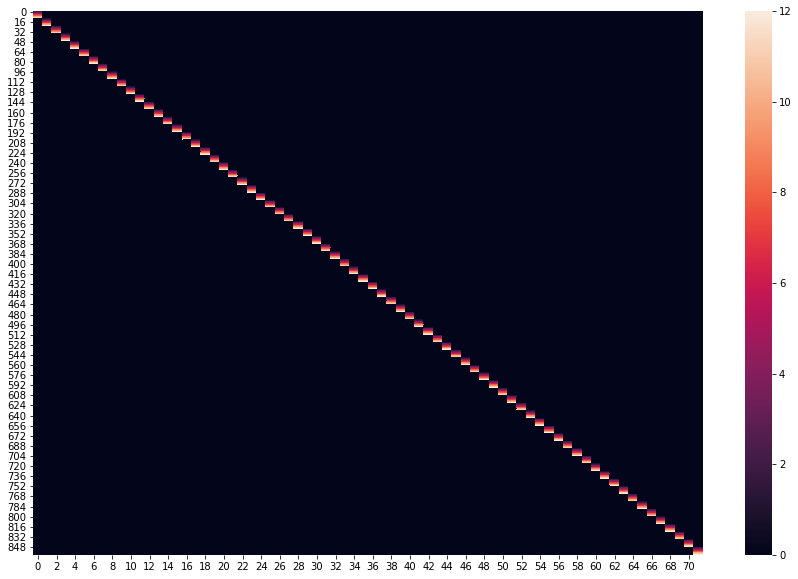

In [45]:
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(possible_Z_slope_df)

In [46]:
Z.shape

(861, 72)

In [47]:
possible_Z_slope_df.values.shape

(861, 72)

In [48]:
# ntheta = x.shape[1]
ntheta_fixed = 1 #(time,)
ntheta_random = 72 #(amount of pigs groups)
theta_fixed = ca.SX.sym("theta_fixed", ntheta_fixed)
theta_random = ca.SX.sym("theta_random", ntheta_random*2)

alpha=1

model_method = "ols"

In [49]:
# model_fixed = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random)

In [50]:
# model_fixed = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z_random_intercept, theta_random) + ca.mtimes(Z_random_slope, theta_random)

In [51]:
# theta_random[0:ntheta_random]#.shape

In [52]:
theta_random[ntheta_random:].shape

(72, 1)

In [53]:
model_lmm = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random[0:ntheta_random]) + ca.mtimes(possible_Z_slope_df.values, theta_random[ntheta_random:])

In [54]:
# create residual
e = y.values.reshape(-1, 1) - model_lmm

In [55]:
# ca.vertcat([ntheta_fixed, ntheta_random])
# ca.vertcat(theta_fixed, theta_random)

In [56]:
# # create residual
# e = y - ca.mtimes(x, theta)


if model_method == "ols":
    # create optimization problem (x: optimization parameter, f: cost function)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5 * ca.dot(e, e), }

elif model_method == "lasso":
    # CASE with regularization in cost function (LASSO)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.sum1(ca.fabs(theta_fixed))}

else:
    # CASE with regularization in cost function (RIDGE)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.dot(theta_fixed, theta_fixed)}

# solve opt
solver = ca.nlpsol("ols", "ipopt", nlp)
sol = solver(x0=np.zeros(ntheta_fixed + ntheta_random*2))

theta_est = sol["x"]

# print(f"theta true: {coef}")
print(f"\ntheta comparison:\n {mdf.params}")
print(f"theta est: {theta_est}")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      361

Total number of variables............................:      145
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

In [57]:
results = flatten(theta_est.toarray().tolist())
np.array(results)

array([ 0.35216662, 15.09696591, 15.86515242, 17.89545258, 19.96363167,
       16.55757333, 18.4106097 , 20.92726818,  4.11363712, 21.90453485,
       14.55302076,  8.01363197, 19.8242347 , 16.00908485, 13.35151364,
       12.24848121, 21.28787   , 20.35605091, 20.94091348, 18.5302997 ,
       16.23636106,  9.41818227, 10.03181652,  5.13939515, 20.25756561,
       23.10303182, 12.41818218, 19.32909218, 14.56181055, 19.14393076,
       14.89545348, 18.67727   , 12.44544576,  9.05151197, 13.27878167,
       11.18788712, 14.31059939, 11.72423909, 16.37727803, 24.39090424,
       16.90302409, 16.60150015, 17.50908758, 16.69090803, 16.97272379,
       11.96363152,  9.42727424, 12.19999455, 27.99543636,  7.11211545,
       18.36969136, 13.31363424, 14.85454621, 12.80454682, 13.26969606,
       18.29695273, 20.5954453 , 12.06362152, 15.62272576, 12.32273682,
       16.32424   , 11.7742403 , 18.08180621, 29.17422545, 22.57879197,
       15.01363348, 15.8757547 , 13.36968652, 14.34242318, 14.88

In [65]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

In [58]:
len(np.repeat(results[2:], repeats=6))

858

In [59]:
fitted_values = y[:-3] * np.repeat(results[2:], repeats=6) * results[1] + results[0]
# fitted_values = y[:-3] * results[1] + results[0]

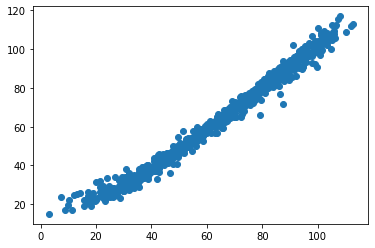

In [60]:
_ = plt.scatter(mdf.fittedvalues, data[target])

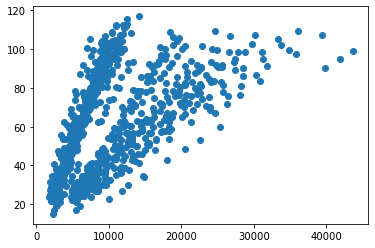

In [61]:
_ = plt.scatter(fitted_values, y[:-3])

In [62]:
# order_of_estimates = fixed_intercept, fixed_coefficients, random_intercept, random_slope

In [63]:
len(results)

145

In [64]:
sol

{'f': DM(2164.56),
 'g': DM([]),
 'lam_g': DM([]),
 'lam_p': DM([]),
 'lam_x': DM([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'x': DM([0.352167, 15.097, 15.8652, 17.8955, 19.9636, 16.5576, 18.4106, 20.9273, 4.11364, 21.9045, 14.553, 8.01363, 19.8242, 16.0091, 13.3515, 12.2485, 21.2879, 20.3561, 20.9409, 18.5303, 16.2364, 9.41818, 10.0318, 5.1394, 20.2576, 23.103, 12.4182, 19.3291, 14.5618, 19.1439, 14.8955, 18.6773, 12.4454, 9.05151, 13.2788, 11.1879, 14.3106, 11.7242, 16.3773, 24.3909, 16.903, 16.6015, 17.5091, 16.6909, 16.9727, 11.9636, 9.42727, 12.2, 27.9954, 7.11212, 18.3697, 13.3136, 14.8545, 